In [18]:
#THERE ARE SOME STEPS THAT WE'LL GONNA PERFORME HERE TO
#MAKE THE ML MODEL WHICH WILL HELP US TO MAKE DECISION WHETHER CLIENT SHOULD BE APPROVED/REJECTED FOR LOAN.

#step 1 (Import all the important library)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#step 2 (Load csv file )

df = pd.read_csv('loan_approval_dataset.csv')


In [20]:
df.info()       # check data types and total values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [21]:
df.head()       # first few rows


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [22]:
df.nunique()    # count of unique values per column


loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [23]:
df.isnull().sum()   # total missing values in each column


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [24]:
df.duplicated().sum()  # check duplicates


np.int64(0)

In [25]:
#there were space before text in column name so i trim it to make it standard format 

df.columns=df.columns.str.strip()

In [26]:
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [27]:
numerical_columns=df.describe() #summary of basic statistics numerical_columns
numerical_columns

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [28]:
categorical_columns= df.describe(include = 'object') #summary of basic statistics categorical_columns
categorical_columns

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [29]:
print(df.select_dtypes(include=['number']).dtypes)

loan_id                     int64
no_of_dependents            int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
dtype: object


In [30]:
numerical_column= df.select_dtypes(include=['int64','float64']).columns

In [31]:
numerical_column

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [32]:
num_df=df[numerical_column]

In [33]:
corr_matrix=num_df.corr()

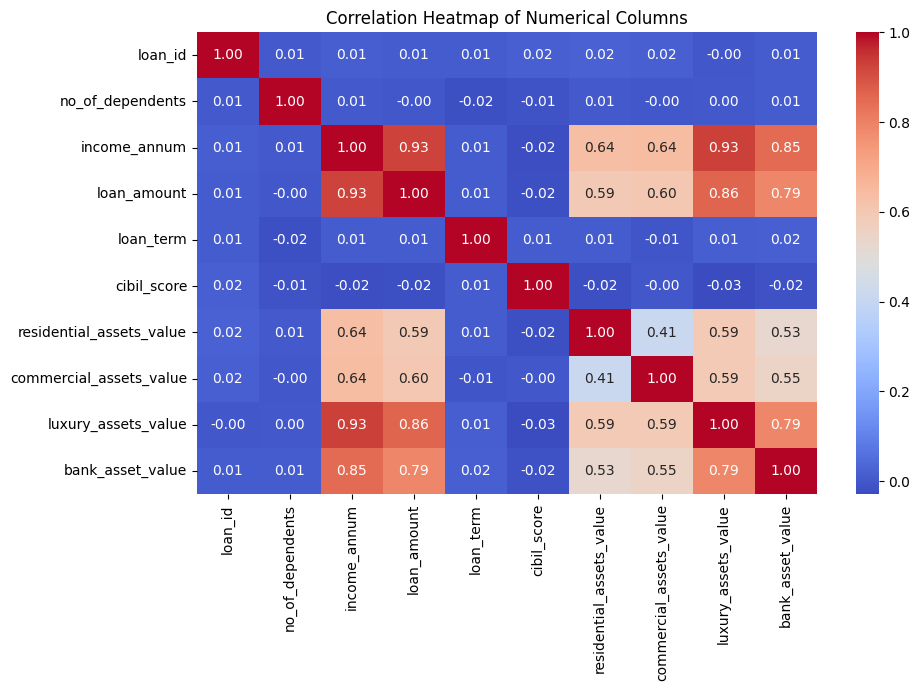

In [34]:
# Ensure inline backend
%matplotlib inline

# Create correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Create a new figure safely
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

# Title and show
ax.set_title("Correlation Heatmap of Numerical Columns")
plt.show()

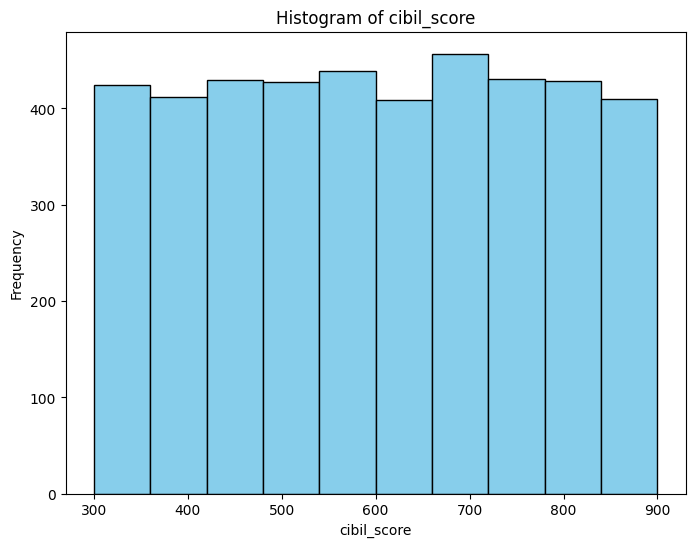

In [35]:

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(df['cibil_score'], bins=10, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {'cibil_score'}')
plt.xlabel('cibil_score')
plt.ylabel('Frequency')
plt.show()

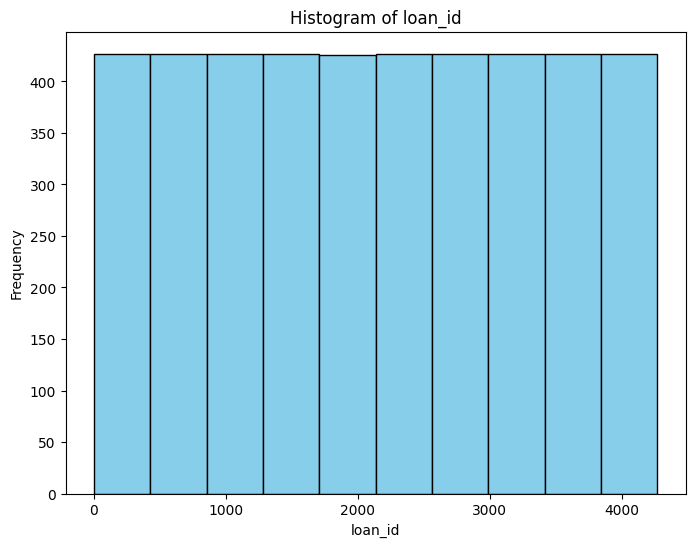

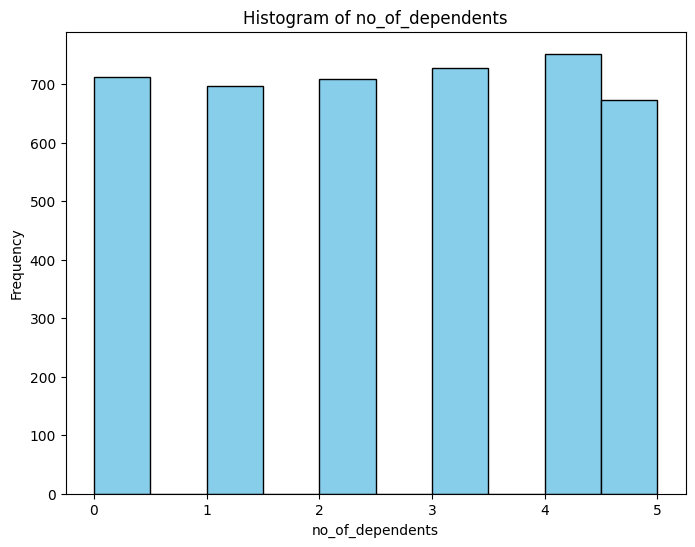

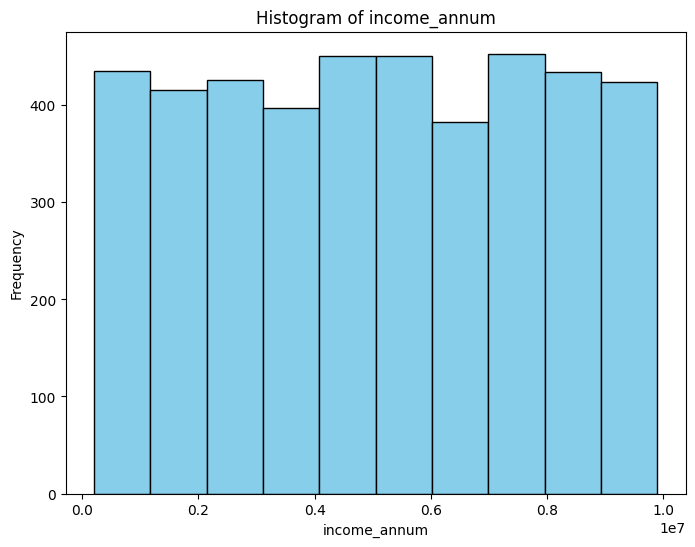

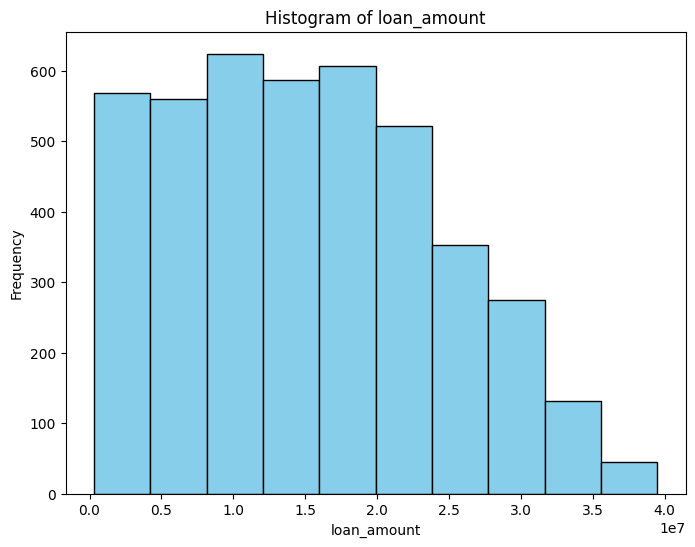

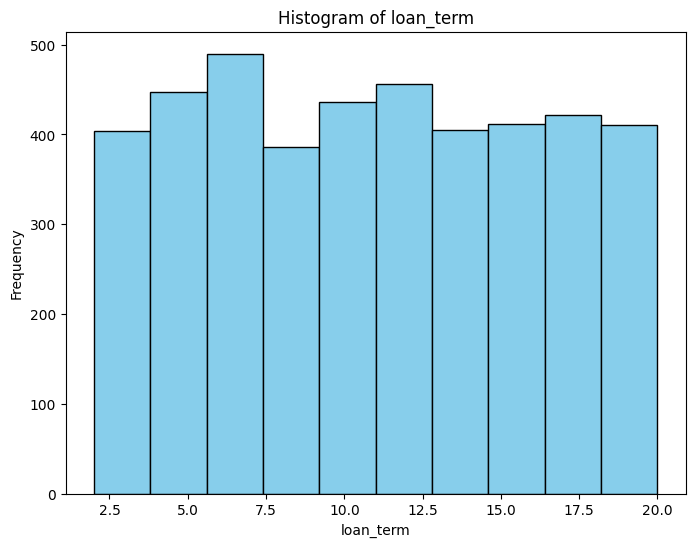

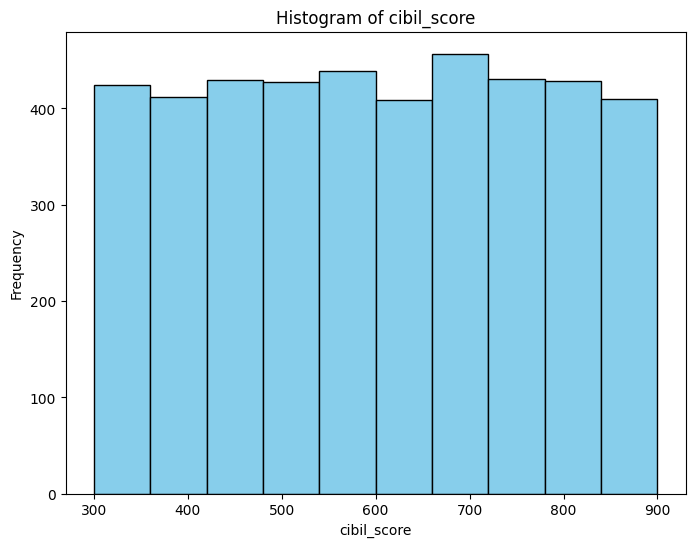

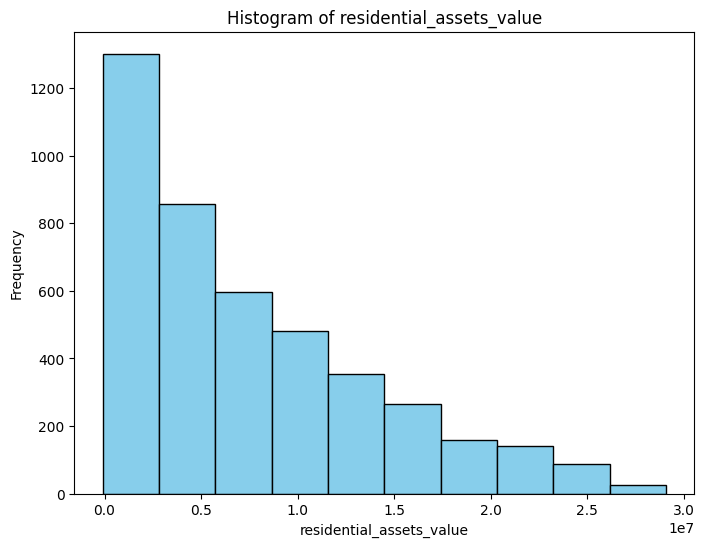

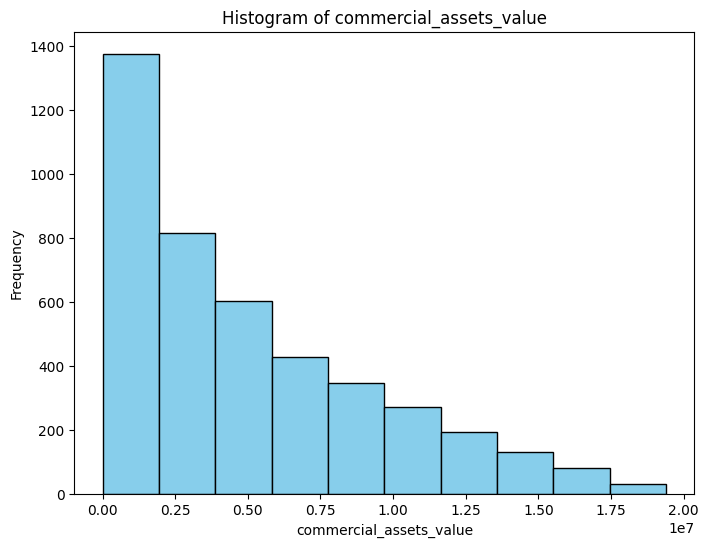

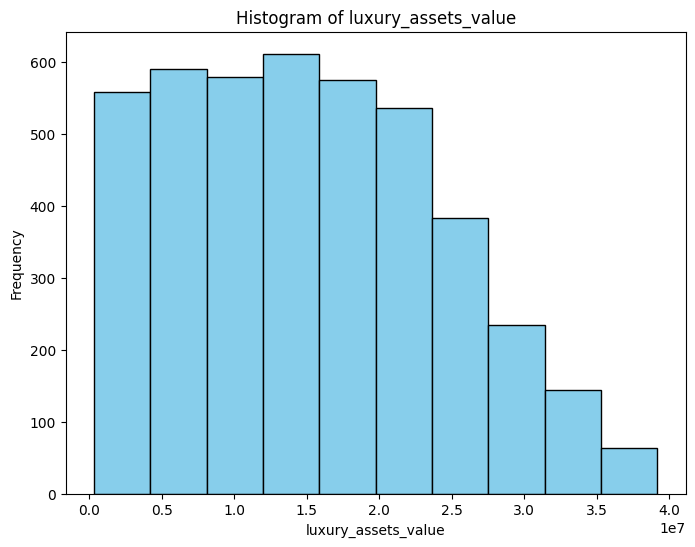

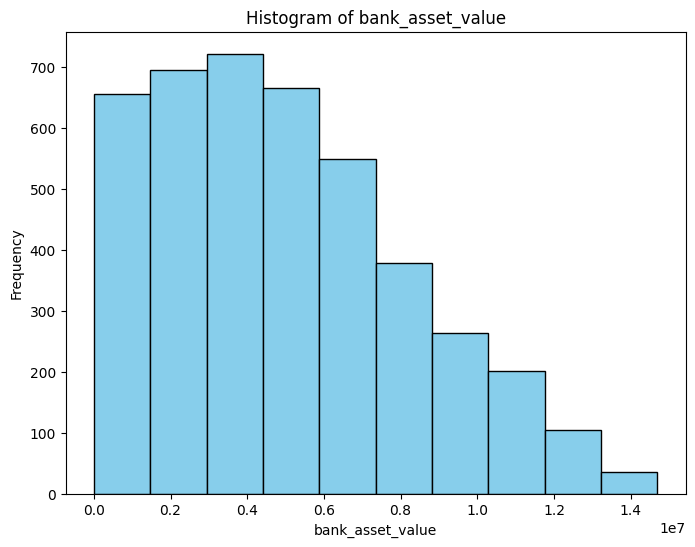

In [83]:
# Plot histogram for each numeric column
for col in numerical_column:
    plt.figure(figsize=(8,6))
    plt.hist(df[col].dropna(), bins=10, color='skyblue', edgecolor='black')  # use col, not 'col'
    plt.title(f'Histogram of {col}')  # f-string will insert the column name
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()

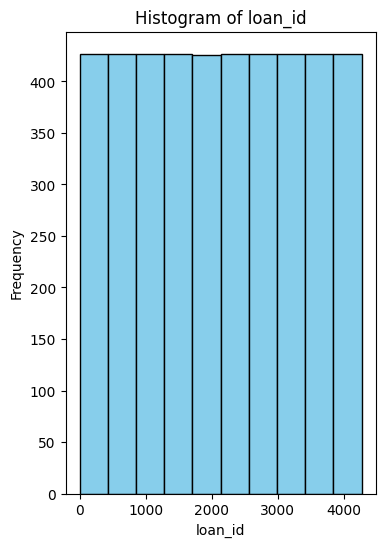

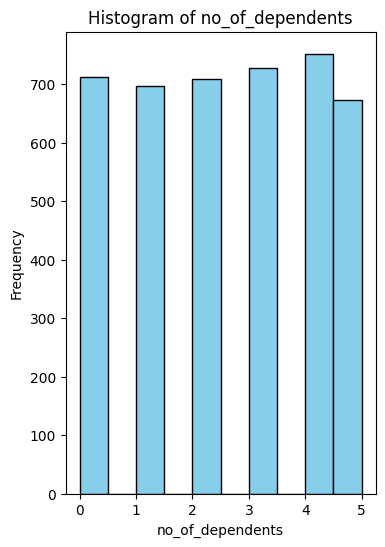

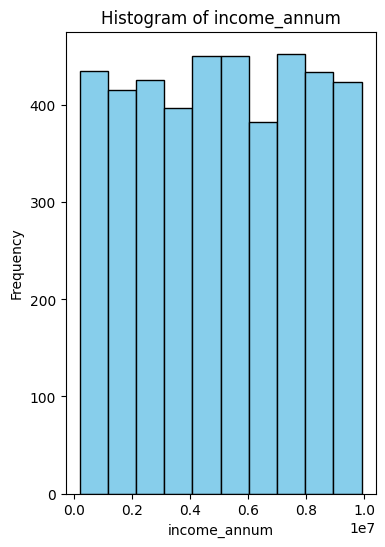

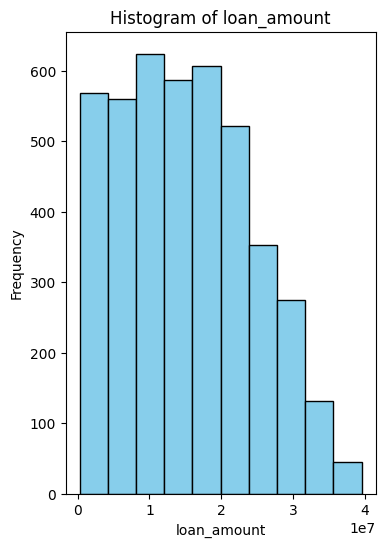

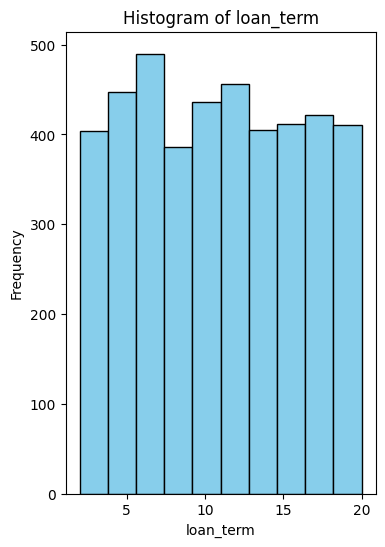

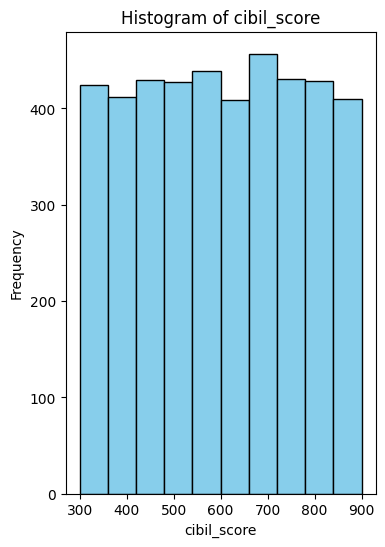

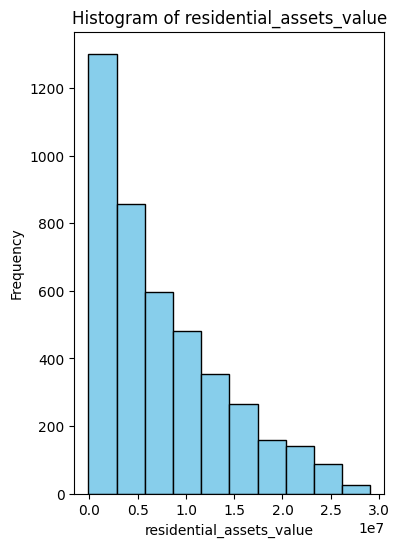

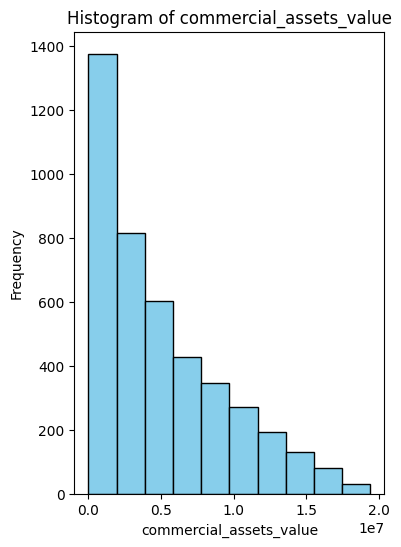

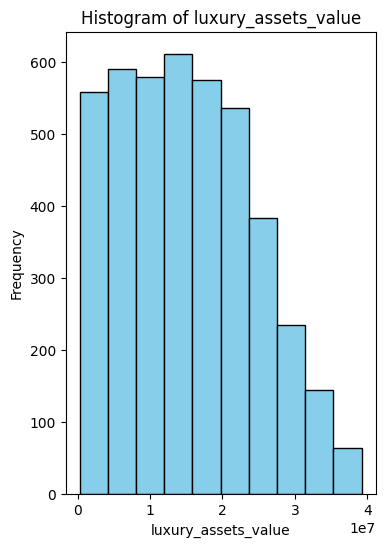

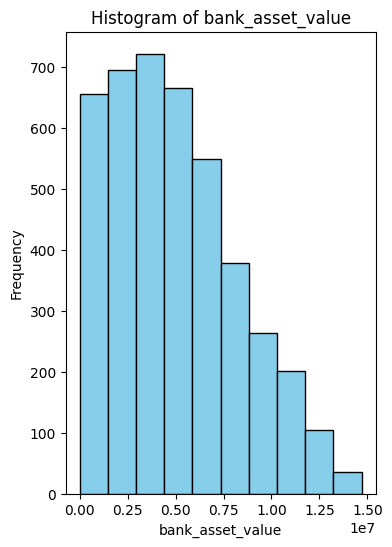

In [84]:
for col in numerical_column:
    plt.figure(figsize=(4,6))
    plt.hist(df[col].dropna(),bins=10,color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Muskan\AppData\Local\Temp\ipykernel_1868\1502046540.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['loan_term'],shade=True)


<Axes: xlabel='loan_term', ylabel='Density'>

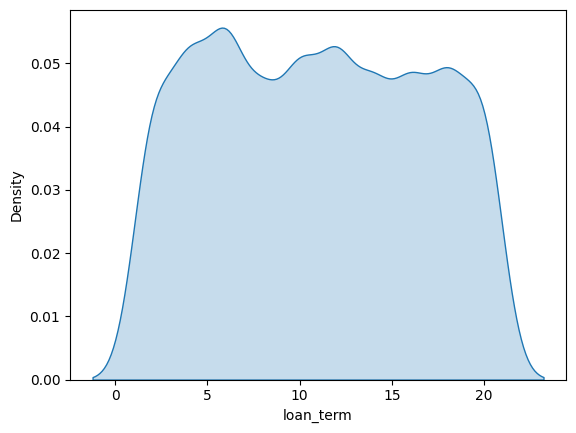

In [89]:
sns.kdeplot(x=df['loan_term'],shade=True)

In [39]:
numerical_column

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [40]:
num_columns  = ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

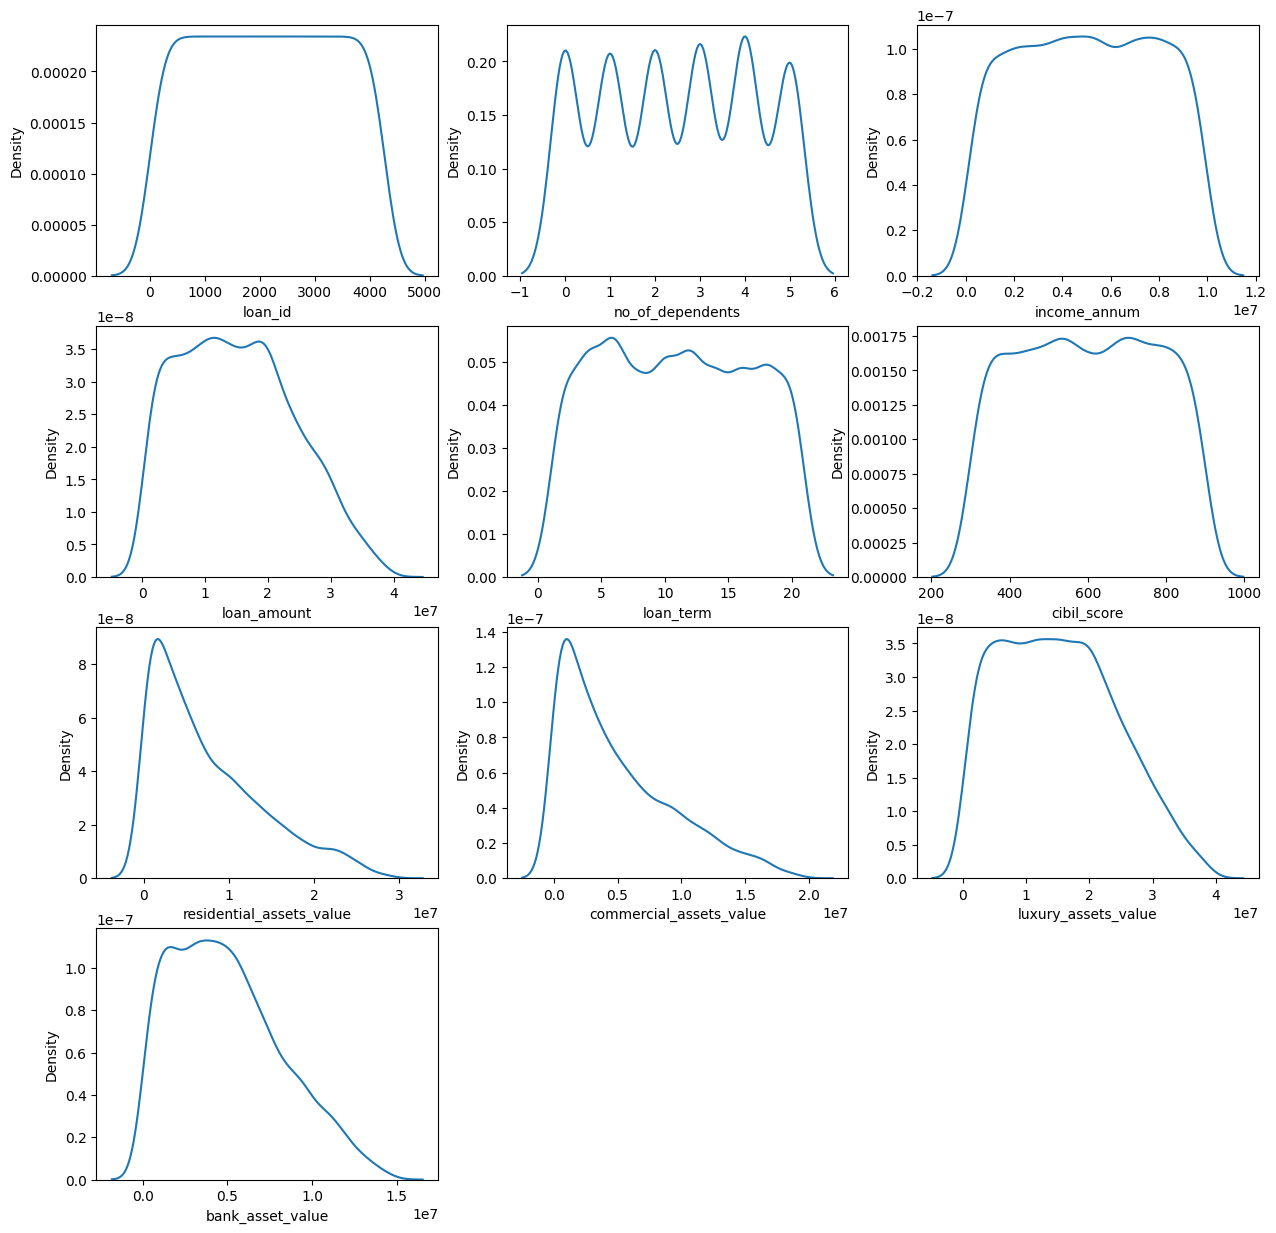

In [41]:
plt.figure(figsize=(15, 15))
for i in range(0,len(num_columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[num_columns[i]])
    plt.show

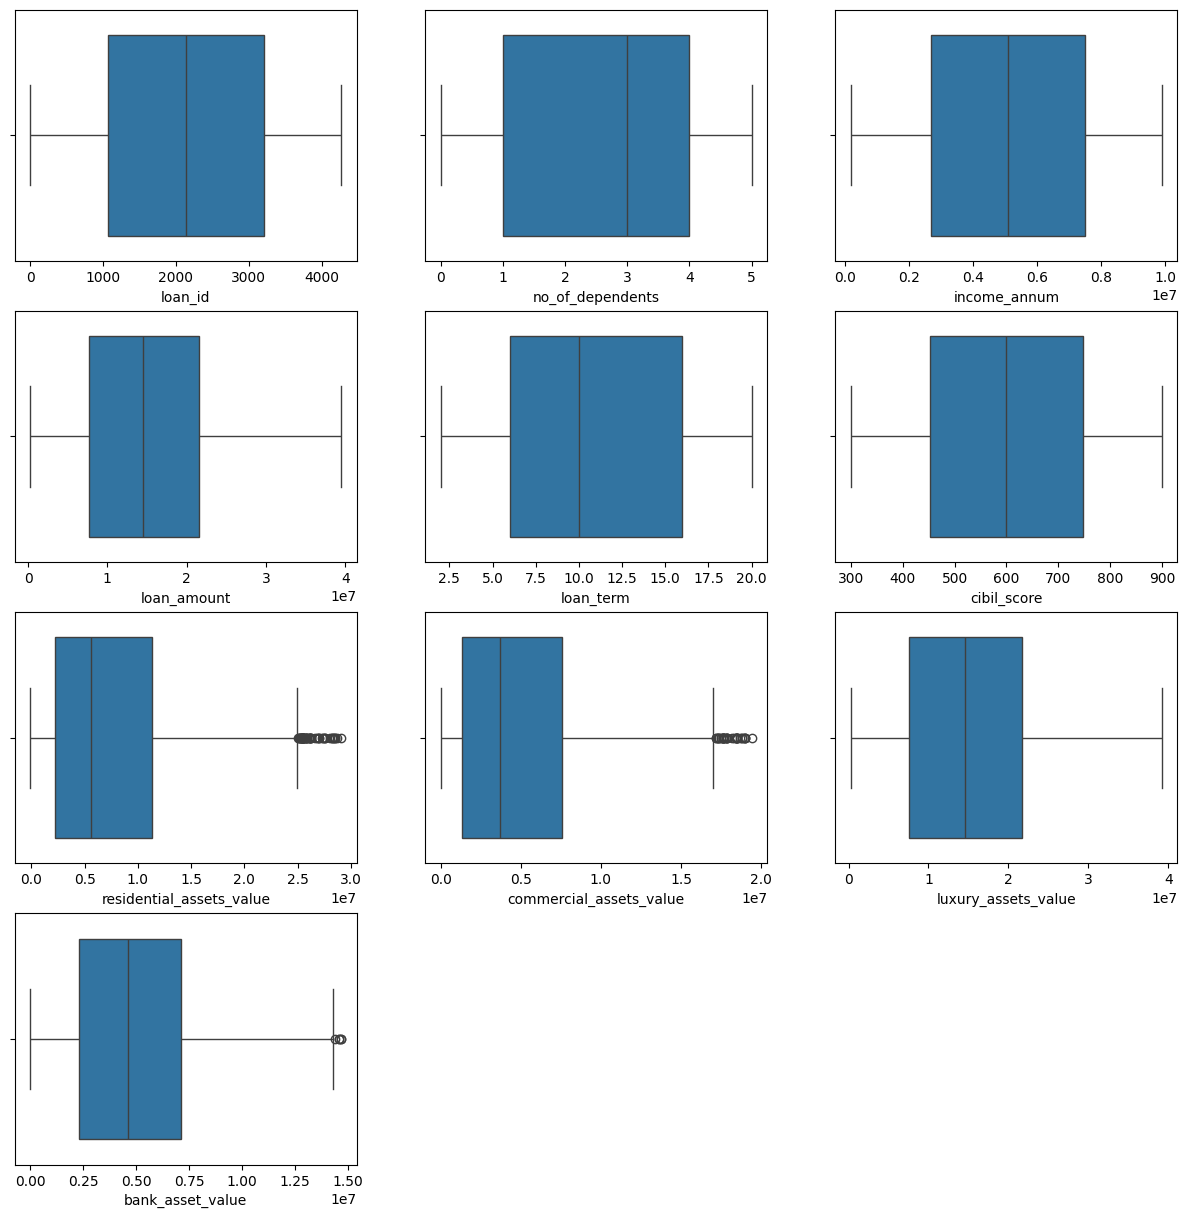

In [42]:
plt.figure(figsize=(15, 15))
for i in range (0,len(num_columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[num_columns[i]])

In [43]:
cate_columns =['education','self_employed','loan_status']

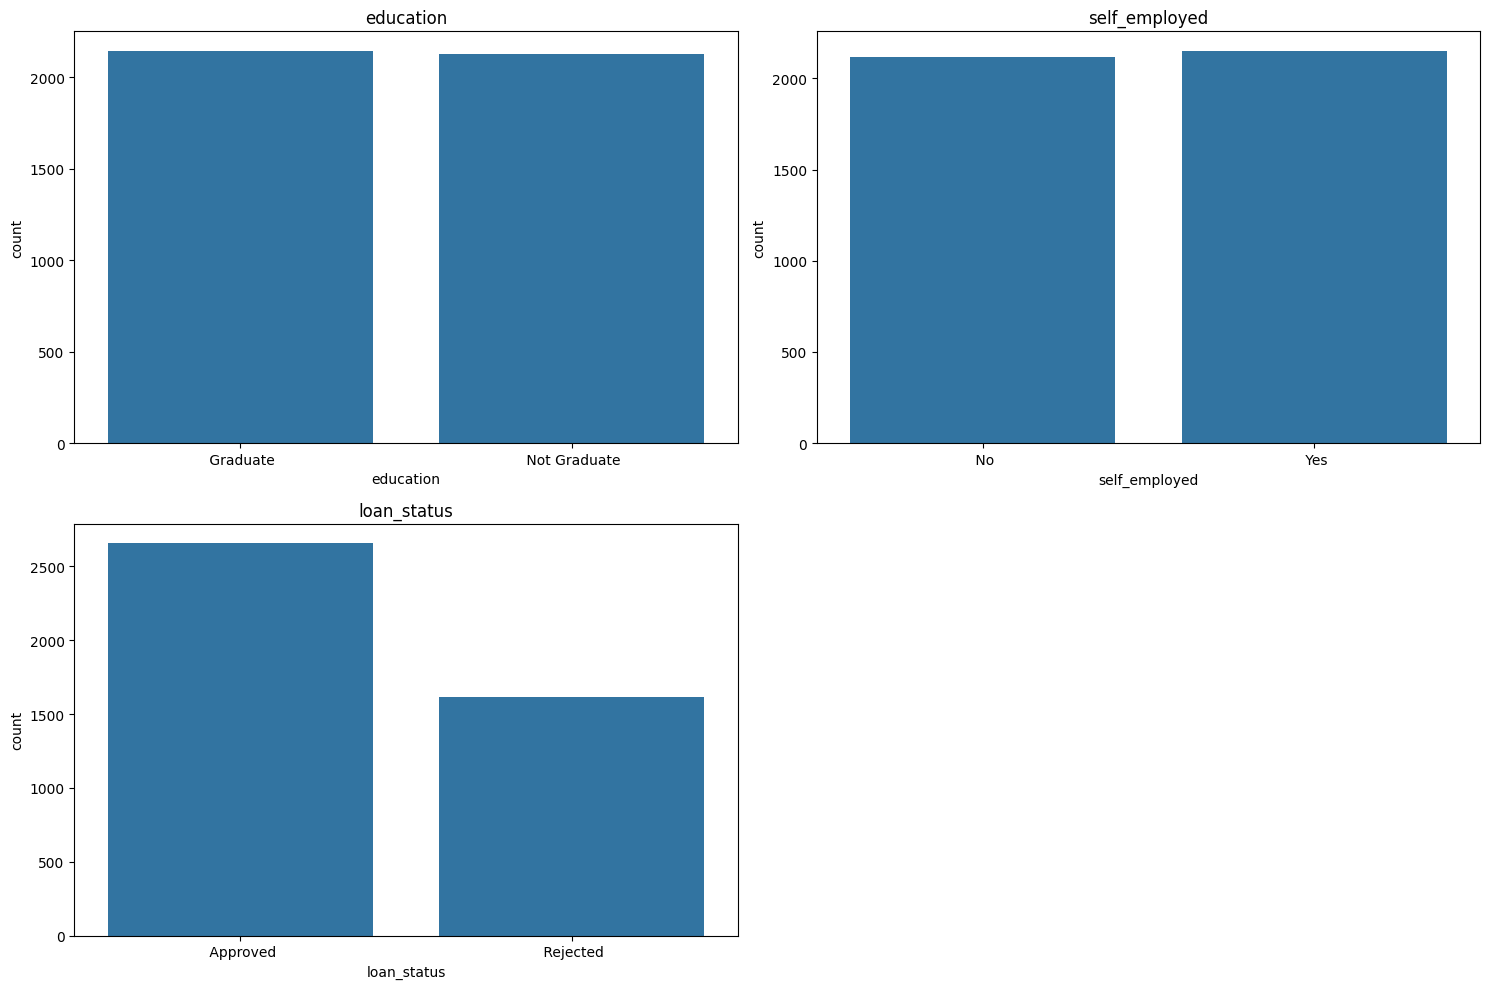

In [44]:

plt.figure(figsize=(15, 10))

for i in range(0, len(cate_columns)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=df[cate_columns[i]])
    plt.title(cate_columns[i])

plt.tight_layout()
plt.show()


In [45]:
num_columns  = ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

<Axes: xlabel='income_annum', ylabel='loan_amount'>

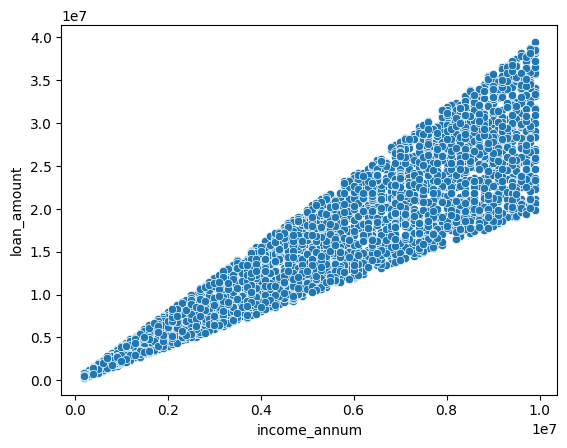

In [46]:
#bi-variate analysis (only perform on numerical_columns)

sns.scatterplot(data = df,x='income_annum',y='loan_amount')

<Axes: xlabel='bank_asset_value', ylabel='loan_amount'>

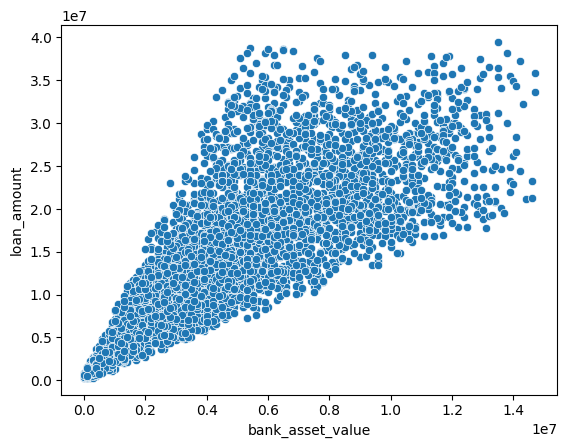

In [47]:
#bi-variate analysis (only perform on numerical_columns)

sns.scatterplot(data = df,x='bank_asset_value',y='loan_amount')

<Axes: xlabel='residential_assets_value', ylabel='loan_amount'>

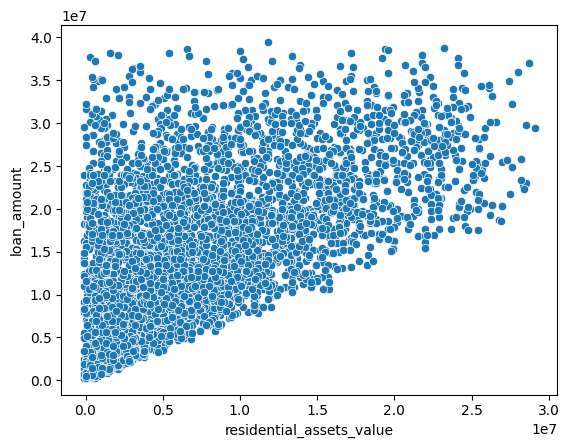

In [48]:
sns.scatterplot(data = df,x='residential_assets_value',y='loan_amount')

In [49]:
#multiccolinearity 
df[num_columns].corr()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


<Axes: >

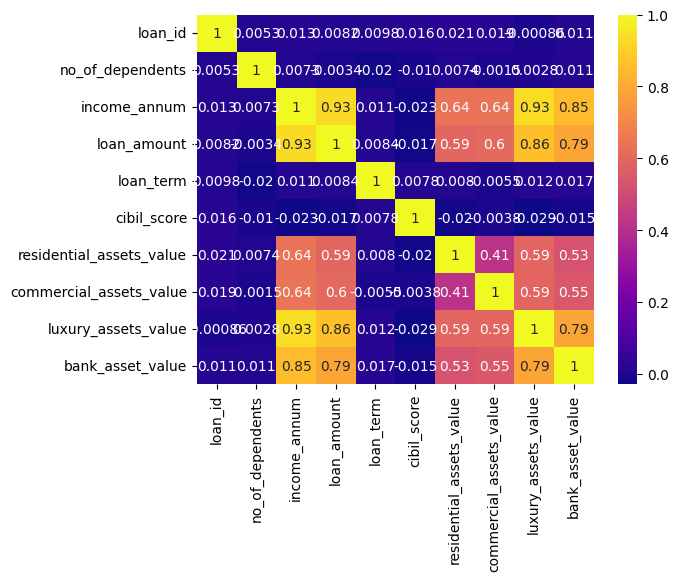

In [50]:
sns.heatmap(data = df[num_columns].corr(),annot= True , cmap = 'plasma')

In [52]:
#feature engineering
#removing unneccessory columns
df.head()
model_data = df.copy()  #creating copy of actual data  

#coverting categorical_data into numerical data 
#called one hot encoding

model_data = pd.get_dummies(model_data,dtype = int)

In [53]:
model_data

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1,0,1,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1,0,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,0,0,1,0,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1,0,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,1,1,0,0,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,1,1,0,1,0


In [54]:
#creating independent and dependent variable

y = model_data[['loan_status_ Approved','loan_status_ Rejected']] #dependent variable
x = model_data.drop(['loan_status_ Approved','loan_status_ Rejected'], axis =1) #independent variable

In [55]:
y

,loan_status_ Approved,loan_status_ Rejected
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4264,0,1
4265,1,0
4266,0,1
4267,1,0


In [56]:
# Model building
# train test split

from sklearn.model_selection import train_test_split 

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2) #20% testing , 80%training

In [58]:
x_train

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
3545,3546,0,2000000,6000000,14,393,1500000,1400000,5900000,2900000,0,1,0,1
1604,1605,5,1500000,5500000,4,414,800000,1400000,2900000,1200000,0,1,0,1
1942,1943,4,8700000,19800000,14,715,13500000,13400000,32000000,8500000,1,0,1,0
2473,2474,3,900000,2300000,12,900,1300000,0,3300000,1100000,0,1,0,1
2613,2614,0,9600000,19600000,12,500,21500000,700000,37600000,10900000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,0,3300000,10800000,12,797,600000,6000000,7700000,3300000,0,1,0,1
877,878,1,5200000,11200000,6,698,14100000,7600000,18800000,2700000,1,0,1,0
1413,1414,2,1500000,5000000,4,613,4400000,1300000,5200000,2100000,0,1,0,1
4225,4226,5,3800000,10300000,16,606,7700000,1900000,9900000,2700000,1,0,0,1


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

regressor = LinearRegression().fit(x_train,y_train) # training the model
pred = regressor.predict(x_test) # testing the model
r_square = r2_score(y_true = y_test,y_pred = pred)

In [60]:
r_square  #not good enough

0.5988810657460264

In [61]:
pred

array([[ 0.54977908,  0.45022092],
       [ 0.25644867,  0.74355133],
       [ 0.97118837,  0.02881163],
       ...,
       [ 1.08361605, -0.08361605],
       [ 0.59270567,  0.40729433],
       [ 0.75423599,  0.24576401]], shape=(854, 2))

In [62]:
x_test[['actual_loan_status_ Approved','actual_loan_status_ Rejected']] = y_test
x_test

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,actual_loan_status_ Approved,actual_loan_status_ Rejected
537,538,1,5900000,15200000,2,547,17100000,2000000,14700000,3600000,1,0,1,0,0,1
2183,2184,4,7300000,18300000,8,434,10000000,2900000,26800000,6700000,1,0,0,1,0,1
3814,3815,1,5600000,11700000,10,774,11000000,4300000,13100000,6500000,1,0,1,0,1,0
1539,1540,4,1500000,4600000,6,524,3700000,2000000,5000000,1400000,0,1,0,1,0,1
1602,1603,4,9700000,25000000,4,542,9800000,12000000,29300000,13400000,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,3361,5,8300000,20700000,2,537,8400000,14300000,19700000,7800000,0,1,1,0,0,1
3246,3247,2,5400000,14800000,6,724,1000000,400000,13100000,5400000,0,1,0,1,1,0
2995,2996,4,2600000,8500000,4,775,600000,3800000,10400000,2600000,1,0,1,0,1,0
3845,3846,4,3400000,11800000,20,616,5000000,3300000,9900000,2900000,1,0,0,1,1,0


In [63]:
x_test[['pred_loan_status_ Approved','pred_loan_status_ Rejected']] = pred
x_test

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,actual_loan_status_ Approved,actual_loan_status_ Rejected,pred_loan_status_ Approved,pred_loan_status_ Rejected
537,538,1,5900000,15200000,2,547,17100000,2000000,14700000,3600000,1,0,1,0,0,1,0.549779,0.450221
2183,2184,4,7300000,18300000,8,434,10000000,2900000,26800000,6700000,1,0,0,1,0,1,0.256449,0.743551
3814,3815,1,5600000,11700000,10,774,11000000,4300000,13100000,6500000,1,0,1,0,1,0,0.971188,0.028812
1539,1540,4,1500000,4600000,6,524,3700000,2000000,5000000,1400000,0,1,0,1,0,1,0.495331,0.504669
1602,1603,4,9700000,25000000,4,542,9800000,12000000,29300000,13400000,1,0,0,1,0,1,0.542676,0.457324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,3361,5,8300000,20700000,2,537,8400000,14300000,19700000,7800000,0,1,1,0,0,1,0.543105,0.456895
3246,3247,2,5400000,14800000,6,724,1000000,400000,13100000,5400000,0,1,0,1,1,0,0.922459,0.077541
2995,2996,4,2600000,8500000,4,775,600000,3800000,10400000,2600000,1,0,1,0,1,0,1.083616,-0.083616
3845,3846,4,3400000,11800000,20,616,5000000,3300000,9900000,2900000,1,0,0,1,1,0,0.592706,0.407294


In [64]:
x_test['error_Approved'] = x_test['actual_loan_status_ Approved'] - x_test['pred_loan_status_ Approved']
x_test['error_Rejected'] = x_test['actual_loan_status_ Rejected'] - x_test['pred_loan_status_ Rejected']

x_test

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,actual_loan_status_ Approved,actual_loan_status_ Rejected,pred_loan_status_ Approved,pred_loan_status_ Rejected,error_Approved,error_Rejected
537,538,1,5900000,15200000,2,547,17100000,2000000,14700000,3600000,1,0,1,0,0,1,0.549779,0.450221,-0.549779,0.549779
2183,2184,4,7300000,18300000,8,434,10000000,2900000,26800000,6700000,1,0,0,1,0,1,0.256449,0.743551,-0.256449,0.256449
3814,3815,1,5600000,11700000,10,774,11000000,4300000,13100000,6500000,1,0,1,0,1,0,0.971188,0.028812,0.028812,-0.028812
1539,1540,4,1500000,4600000,6,524,3700000,2000000,5000000,1400000,0,1,0,1,0,1,0.495331,0.504669,-0.495331,0.495331
1602,1603,4,9700000,25000000,4,542,9800000,12000000,29300000,13400000,1,0,0,1,0,1,0.542676,0.457324,-0.542676,0.542676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,3361,5,8300000,20700000,2,537,8400000,14300000,19700000,7800000,0,1,1,0,0,1,0.543105,0.456895,-0.543105,0.543105
3246,3247,2,5400000,14800000,6,724,1000000,400000,13100000,5400000,0,1,0,1,1,0,0.922459,0.077541,0.077541,-0.077541
2995,2996,4,2600000,8500000,4,775,600000,3800000,10400000,2600000,1,0,1,0,1,0,1.083616,-0.083616,-0.083616,0.083616
3845,3846,4,3400000,11800000,20,616,5000000,3300000,9900000,2900000,1,0,0,1,1,0,0.592706,0.407294,0.407294,-0.407294


In [67]:
Q1 = df['loan_amount'].quantile(0.25)
Q3 = df['loan_amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Cap the outliers
df['loan_amount'] = np.where(df['loan_amount']>upper, upper,
                             np.where(df['loan_amount']<lower, lower, df['loan_amount']))


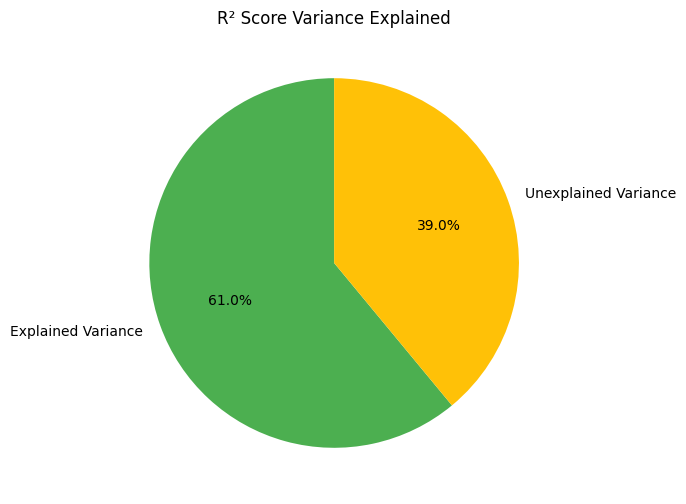

In [69]:
import matplotlib.pyplot as plt

# Data
labels = ['Explained Variance', 'Unexplained Variance']
sizes = [61, 39]
colors = ['#4CAF50', '#FFC107']  # Green for explained, Yellow for unexplained

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('R² Score Variance Explained')
plt.show()
